# Wine Classification

Author: Rafael Godoy

LinkedIn: www.linkedin.com/in/Rafael-Godoy-ML-Eng

Github: https://github.com/RafaelSilvaGodoy


This notebook will show a **basic use of Neural Network** for **binary classification**.

The wines will be classified as good if the note is superior of 5, otherwise bad.


The dataset was provided by [Kaggle wine dataset](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

import random
# Set seed to 42 for reproducibility.
random.seed(42)

## Data Preparation

In [27]:
df = pd.read_csv('winequality-red.csv')
print(f'Dataset size: {df.shape}')
df.sample(4)

Dataset size: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1490,7.1,0.22,0.49,1.8,0.039,8.0,18.0,0.99344,3.39,0.56,12.4,6
1543,11.1,0.44,0.42,2.2,0.064,14.0,19.0,0.99758,3.25,0.57,10.4,6
387,8.3,0.66,0.15,1.9,0.079,17.0,42.0,0.99720,3.31,0.54,9.6,6
466,10.3,0.50,0.42,2.0,0.069,21.0,51.0,0.99820,3.16,0.72,11.5,6


In [26]:
print(f'Number of missing values on the dataset: {df.isna().sum(axis=0).sum()}')

# The Correlation Matrix between the dataset variables shows us a glance of how the variables correlate with the 'Quality' column.
df.corr().style.background_gradient()

Number of missing values on the dataset: 0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [3]:
# Transforms the 'quality' column into boolean where True means good.
df['quality'] = df['quality'] > 5

# Save the target variable into y and the inputs as X.
y = df.pop('quality')
X = df.copy()

In [4]:
# Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Normalization of X. Neural Networks tends to learn better with lower numbers.
ss = StandardScaler()
ss.fit(X_train)

# Notice that the Scaler is trained with the training data, but it is applied in either training and test data.
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## Modeling

In [6]:
# In this notebook, it will be created a Sequential NN with Dense layers.
# Notice that in the last layer it is used the sigmoid activation function and only one neuron to recieve a probability of beeing Good.
x_dim = X_train.shape[1]

rna = Sequential()
rna.add(layers.Dense(16, activation='relu', input_dim=x_dim))
rna.add(layers.Dense(1, activation='sigmoid'))

rna.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [7]:
# The loss funcion is set to be 'binary_crossentropy' and metrics 'AUC' due to the problem be a binary classification one.
rna.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['AUC'])

history = rna.fit(X_train, y_train, epochs=200, validation_data=(X_test,y_test), verbose=1)

Epoch 1/200
40/40 [==============================] - 1s 4ms/step - loss: 0.6438 - auc: 0.6967 - val_loss: 0.6054 - val_auc: 0.7307
Epoch 2/200
40/40 [==============================] - 0s 1ms/step - loss: 0.6032 - auc: 0.7488 - val_loss: 0.5777 - val_auc: 0.7613
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.5783 - auc: 0.7719 - val_loss: 0.5618 - val_auc: 0.7759
Epoch 4/200
40/40 [==============================] - 0s 1ms/step - loss: 0.5629 - auc: 0.7832 - val_loss: 0.5504 - val_auc: 0.7844
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.5516 - auc: 0.7919 - val_loss: 0.5421 - val_auc: 0.7910
Epoch 6/200
40/40 [==============================] - 0s 1ms/step - loss: 0.5441 - auc: 0.7973 - val_loss: 0.5364 - val_auc: 0.7963
Epoch 7/200
40/40 [==============================] - 0s 1ms/step - loss: 0.5376 - auc: 0.8031 - val_loss: 0.5301 - val_auc: 0.8016
Epoch 8/200
40/40 [==============================] - 0s 1ms/step - loss: 0.5329 - a

## Evaluation

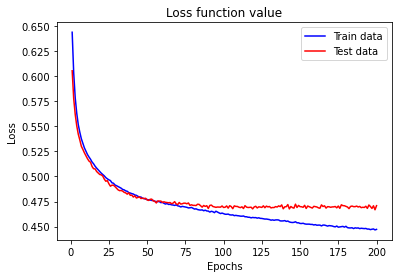

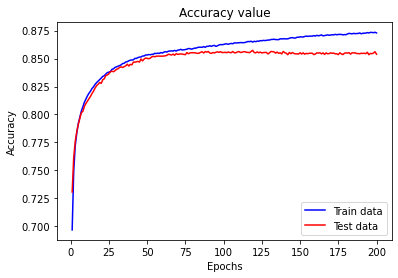

In [15]:
# Retrive the training historic
history_dict = history.history

# Transform the Loss and the Accuracy into vectors.
loss = history_dict['loss']
acc = history_dict['auc']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_auc']

# Create an epoch vector.
epochs = range(1, len(loss) + 1)

# Loss Function x Epochs
plt.plot(epochs, loss, 'b', label='Train data')
plt.plot(epochs, val_loss, 'r', label='Test data')
plt.title('Loss function value')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy x Epochs
plt.plot(epochs, acc, 'b', label='Train data')
plt.plot(epochs, val_acc, 'r', label='Test data')
plt.title('Accuracy value')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
c_train = rna.evaluate(X_train, y_train)
c_test = rna.evaluate(X_test, y_test)

10/10 [==============================] - 0s 953us/step - loss: 0.4708 - auc: 0.8539


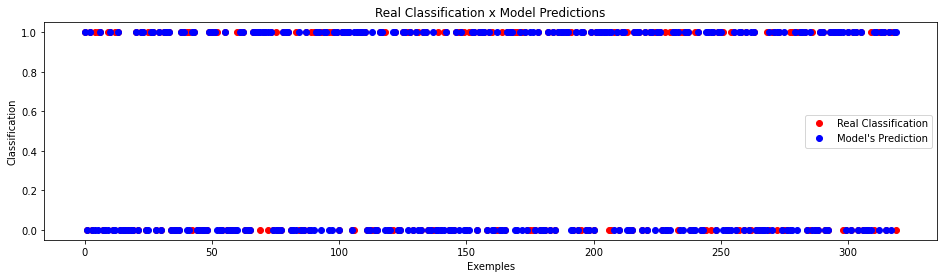

In [16]:
# Make the predictions from the test data and round them since they are a percentage. If it is higher than 0.5, it is 1.
y_prev = rna.predict(X_test)
classes = np.round(y_prev)

# Real Classification x Model Predictions
plt.figure(figsize=(16, 4))
plt.plot(y_test.reset_index(drop=True), 'ro', label='Real Classification')
plt.plot(classes, 'bo', label="Model's Prediction")
plt.title('Real Classification x Model Predictions')
plt.xlabel('Exemples')
plt.ylabel('Classification')
plt.legend()
plt.show()

# Conclusion

On a binary classificator, a random generator accuracy is 0.5 since the data has two outcomes.

This Basic Neural Network model was able to achive an accuracy of 0.8539 for the test data using only 1 dense layer and 1 output layer.

As we can see on the **Evaluation section**, the train data loss function was minimized along the test data without neither overfitting or underfitting.

The 'Classification x Model Predictions' plot shows a predominance of right prediction (blue dots) and few wrong ones (red dots).

A better result could be achived with a few improviments such as:
- Higher database (*only 1599 examples used*);
- Different hyperparameters on the network setup;
- Better Data Preparation techniques;